In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random

In [2]:
dataPath = 'E:/mythesis/01-DataSet/images'

In [3]:
"""
This function take the dictory-Path of images and:-
1-Read image from each category file.
2-resize images to 40x40x3.
3-labeling image:-
    0-->Stop
    1-->Slow
    2-->Crosswalk
4-Shuffle the array to randomized it.
5-Divide into X,Y
return X,Y
"""
def loadDataSet(dataPath):
    data = []
    imageSize = 40
    for cat in os.listdir(dataPath):
        label = int(cat[:2])
        for i in os.listdir(dataPath+'/'+cat):
            imagePath = dataPath+'/'+cat+'/'+i
            try:
                image = cv2.imread(imagePath,0) 
                image = cv2.resize(image,(imageSize,imageSize))
                data.append([image,label])
            except:
                pass
    
    random.shuffle(data)
    
    X = [] #image
    Y = [] #labels
    for img,l in data: 
        X.append(img)
        Y.append(l)
    X = np.array(X)
    Y = np.array(Y).reshape(len(Y),1)
    return X,Y

In [4]:
#Load Data Set 
images,labels=loadDataSet(dataPath)
labels

array([[0],
       [0],
       [1],
       [2],
       [2],
       [0],
       [0],
       [2],
       [0],
       [2],
       [0],
       [0],
       [2],
       [0],
       [2],
       [1],
       [0],
       [2],
       [0],
       [0],
       [2],
       [0],
       [0],
       [2],
       [0],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [0],
       [2],
       [1],
       [2],
       [2],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [2],
       [0],
       [2],
       [1],
       [1],
       [0],
       [1],
       [1],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [0],
       [1],
       [2],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
    

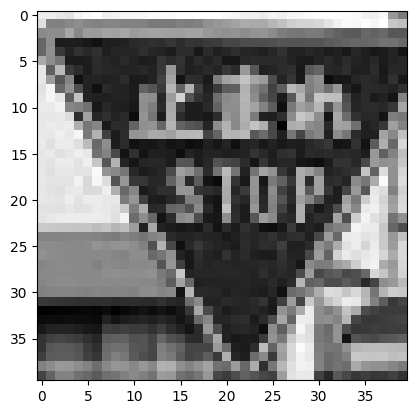

[0]


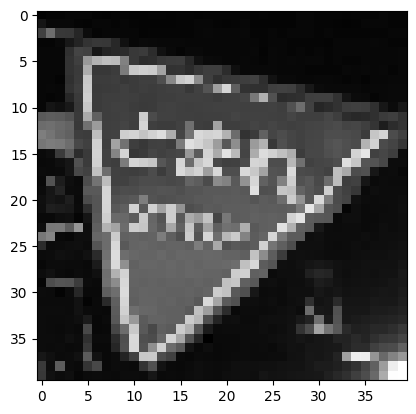

[0]


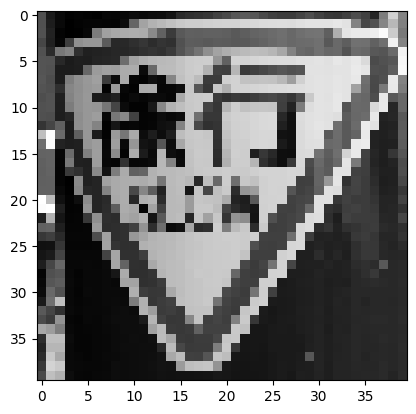

[1]


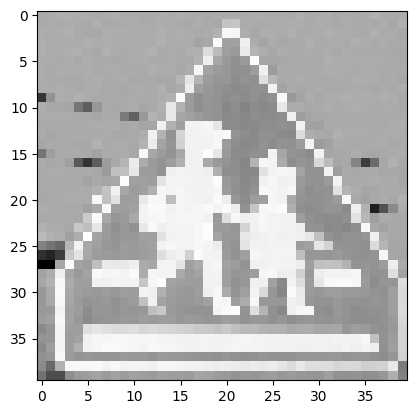

[2]


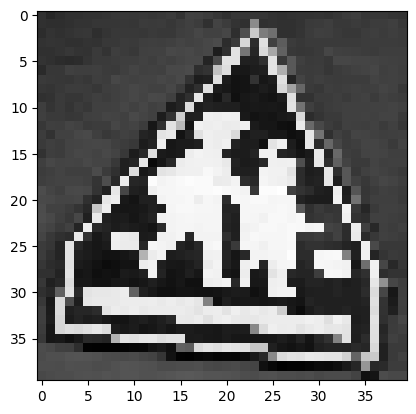

[2]


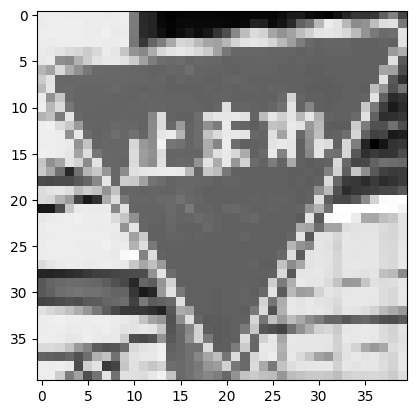

[0]


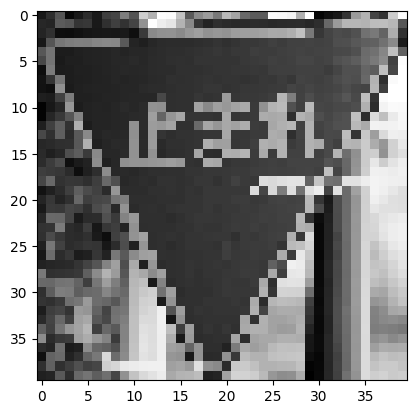

[0]


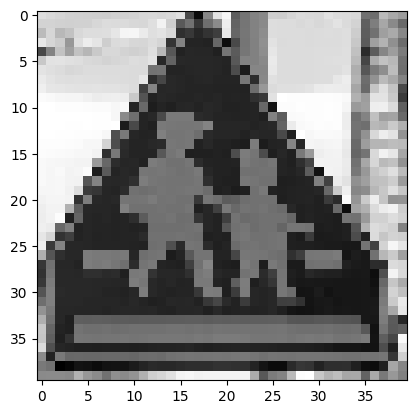

[2]


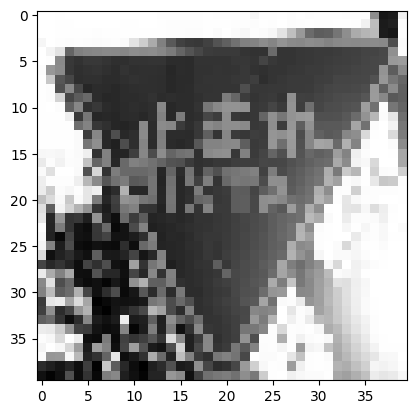

[0]


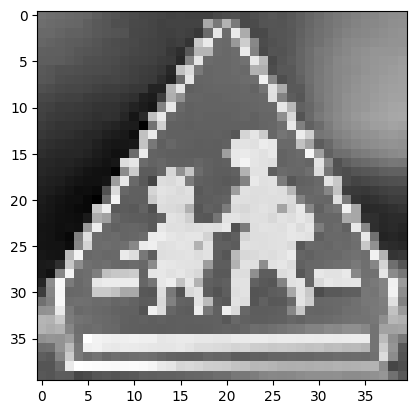

[2]


In [5]:
#plot some examples from our images
for i in range(10):
    plt.imshow(images[i],cmap='gray')
    plt.show()
    print(labels[i])

In [6]:
#Compute the mean and Standard Deviation , becouse we need it Later in Normalize the images 
mu=np.mean(images)
std=np.std(images)
print("The Mean=",mu)
print("The Standard Deviation=",std)

The Mean= 124.29100235849057
The Standard Deviation= 65.38073440717122


In [7]:
images.shape

(318, 40, 40)

In [8]:
m=images.shape[0] # 3D Array (number of training images,)
imageShape=images.shape[1:]

In [9]:
#Splitting Data into Training Set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=0)
print("the Number of Training Example=",x_train.shape[0])
print("the Number of Testing Example=",x_test.shape[0])

the Number of Training Example= 254
the Number of Testing Example= 64


In [10]:
x_trainNorm = (x_train - mu)/std
x_testNorm  = (x_test - mu)/std
print("Shape of x_trainNorm:", x_trainNorm.shape)
print("Shape of x_testNorm:", x_testNorm.shape)
x_trainNorm = x_trainNorm.reshape(254, 40, 40,1)
x_testNorm = x_testNorm.reshape(64, 40, 40,1)

Shape of x_trainNorm: (254, 40, 40)
Shape of x_testNorm: (64, 40, 40)


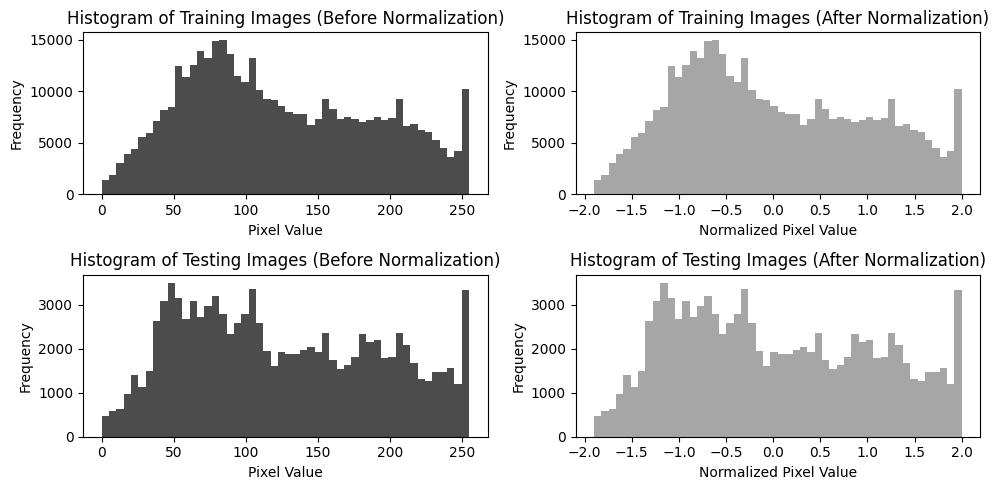

In [11]:
# Flatten the images for histogram plotting
x_train_flattened = x_train.flatten()
x_test_flattened = x_test.flatten()
x_trainNorm_flattened = x_trainNorm.flatten()
x_testNorm_flattened = x_testNorm.flatten()

# Plot histograms
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.hist(x_train_flattened, bins=50, color='black', alpha=0.7)
plt.title('Histogram of Training Images (Before Normalization)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(x_trainNorm_flattened, bins=50, color='gray', alpha=0.7)
plt.title('Histogram of Training Images (After Normalization)')
plt.xlabel('Normalized Pixel Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(x_test_flattened, bins=50, color='black', alpha=0.7)
plt.title('Histogram of Testing Images (Before Normalization)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(x_testNorm_flattened, bins=50, color='gray', alpha=0.7)
plt.title('Histogram of Testing Images (After Normalization)')
plt.xlabel('Normalized Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
def preprocessingImage(image=None,imageSize=40,mu= 124.29100235849057,std= 65.38073440717123):
    try:
        image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    except:
        pass
    image = cv2.resize(image,(imageSize,imageSize))
    image = (image - mu) / std
    image = image.reshape(1,imageSize,imageSize,1)
    return image

In [13]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow import keras

In [15]:
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>0.997):
            self.model.stop_training=True
            
model = keras.Sequential([
    keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',input_shape=(40,40,1)),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(3,tf.nn.softmax)
])

tensorboard = TensorBoard(log_dir="logsVtest1/{}")
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 38, 38, 8)         80        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 8)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 3459      
                                                                 
Total params: 3539 (13.82 KB)
Trainable params: 3539 (13.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
#Fitting 
model.fit(x_trainNorm,
          y_train,
          epochs=15,
          callbacks=[tensorboard],
          #validation_data=(x_testNorm, y_test)
         )

Epoch 1/15
8/8 [==============================] - 0s 8ms/step - loss: 0.0252 - accuracy: 1.0000
Epoch 2/15
8/8 [==============================] - 0s 9ms/step - loss: 0.0232 - accuracy: 1.0000
Epoch 3/15
8/8 [==============================] - 0s 9ms/step - loss: 0.0219 - accuracy: 1.0000
Epoch 4/15
8/8 [==============================] - 0s 8ms/step - loss: 0.0206 - accuracy: 1.0000
Epoch 5/15
8/8 [==============================] - 0s 7ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 6/15
8/8 [==============================] - 0s 9ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 7/15
8/8 [==============================] - 0s 9ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 8/15
8/8 [==============================] - 0s 9ms/step - loss: 0.0162 - accuracy: 1.0000
Epoch 9/15
8/8 [==============================] - 0s 9ms/step - loss: 0.0153 - accuracy: 1.0000
Epoch 10/15
8/8 [==============================] - 0s 9ms/step - loss: 0.0146 - accuracy: 1.0000
Epoch 11/15
8/8 [======================

In [18]:
model.evaluate(x_testNorm,
               y_test,
               verbose = 0)

[0.14857855439186096, 0.984375]

In [21]:
model.save('TSModelV4')

INFO:tensorflow:Assets written to: TSModelV4\assets


INFO:tensorflow:Assets written to: TSModelV4\assets


In [29]:
model=keras.models.load_model('Models/TSModelV4')

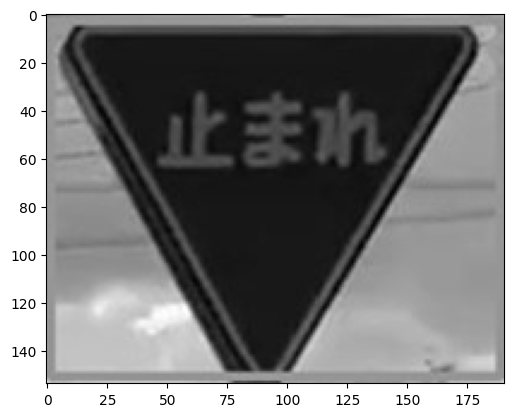

1/1 [==============================] - 0s 26ms/step
Stop = 99.15959%
Slow = 0.8121662%
Crosswalk = 0.028238077%
[[9.9159592e+01 8.1216621e-01 2.8238077e-02]]


In [26]:
imgPath="E:/mythesis/03-Classification/UnseenImages/00/06.jpg"
image = cv2.imread(imgPath,0)
plt.imshow(image, cmap='gray')
plt.show()
img=preprocessingImage(image)
pred=model.predict(img)*100 # 4*1

print("Stop = "+str(pred[0][0])+"%")
print("Slow = " + str(pred[0][1])+"%")
print("Crosswalk = "+str(pred[0][2])+"%")

print(pred)